# Importing required libraries

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Reading and preprocessing the data

In [158]:
df = pd.read_csv("disease prediction training.csv")
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [159]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [160]:
df.shape

(4920, 134)

In [161]:
df.drop('Unnamed: 133', axis=1, inplace=True)
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [162]:
df.shape

(4920, 133)

In [163]:
df=df.rename(columns={"prognosis":"disease","fluid_overload.1":"fluid_overload"})

In [164]:
df['disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [165]:
df["yellowing_of_eyes"].unique()

array([0, 1], dtype=int64)

# Let's split the training data for training and validation
# Then fit on training,predict on validation,then find accuracy of predictions on validation

## <font color="red"> Analysis to show overfitting

### <font color="green">Keeping more data in training,also varying the max_depth.Expected:Less accuracy

In [166]:
x = df.drop('disease', axis = 1)
y = df['disease']
Accuracy=[]
for i in [10,20,30,40,50]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42) 
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(x_train, y_train)
    pred = tree.predict(x_test)
    y_test=np.array(y_test)

    # calculating accuracy
    correct=0
    for j in range(len(pred)):
        if pred[j]==y_test[j]:
            correct+=1
    print("Accuracy on test set manually: {:.2f}%".format((correct/len(pred))*100))




Accuracy on test set manually: 25.00%
Accuracy on test set manually: 47.97%
Accuracy on test set manually: 73.78%
Accuracy on test set manually: 95.73%
Accuracy on test set manually: 97.15%


### <font color="green">Keeping less data in training,also varying the max_depth.Expected:More accuracy

In [167]:
x = df.drop('disease', axis = 1)
y = df['disease']
Accuracy=[]
for i in [10,20,30,40,50]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(x_train, y_train)
    pred = tree.predict(x_test)
    y_test=np.array(y_test)

    # calculating accuracy
    correct=0
    for j in range(len(pred)):
        if pred[j]==y_test[j]:
            correct+=1
    print("Accuracy on test set manually: {:.2f}%".format((correct/len(pred))*100))

Accuracy on test set manually: 25.12%
Accuracy on test set manually: 49.59%
Accuracy on test set manually: 77.07%
Accuracy on test set manually: 96.59%
Accuracy on test set manually: 97.97%


# Droping the columns which are less important

In [168]:
x_test.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [169]:
fi_df = pd.DataFrame({'Feature':x_test.columns,'Importance':tree.feature_importances_})

In [170]:
fi_df

,Feature,Importance
0,itching,0.023337
1,skin_rash,0.000000
2,nodal_skin_eruptions,0.004257
3,continuous_sneezing,0.000000
4,shivering,0.002158
...,...,...
127,small_dents_in_nails,0.001343
128,inflammatory_nails,0.000000
129,blister,0.000000
130,red_sore_around_nose,0.001379


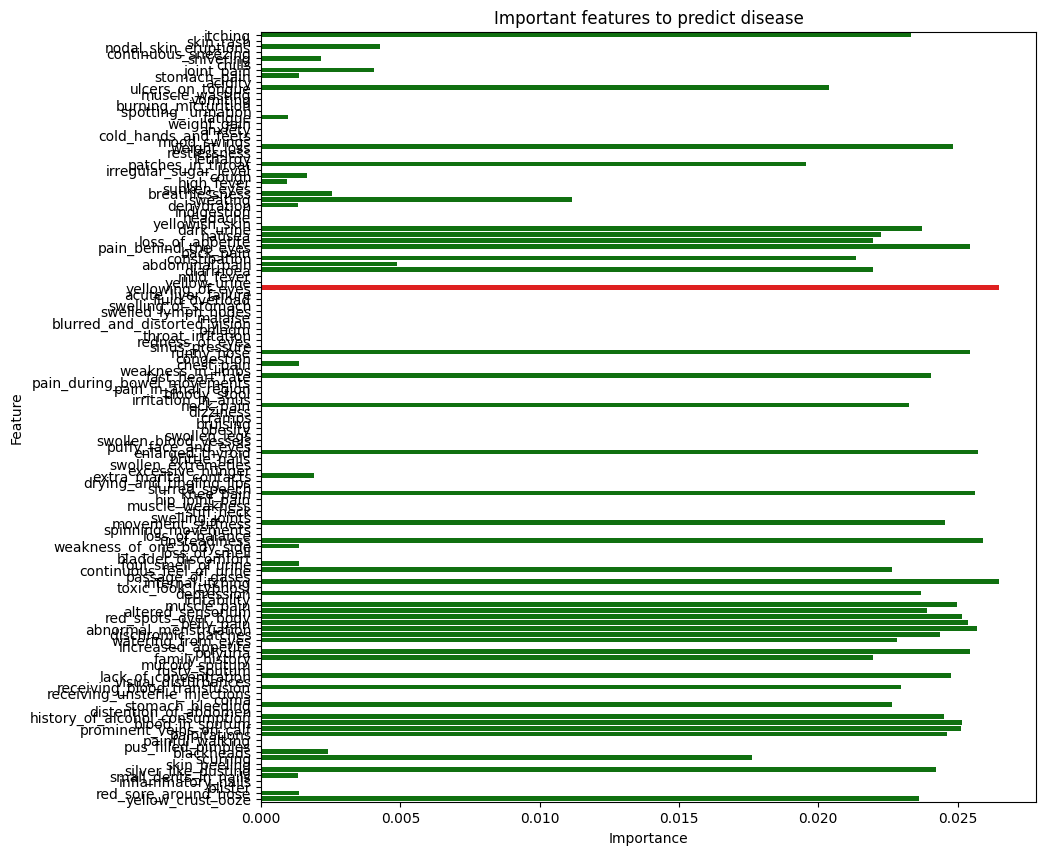

In [171]:
values = fi_df.Importance    
index = fi_df.Feature
plt.figure(figsize=(10,10))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=index,x=values,palette=clrs).set(title='Important features to predict disease')
plt.show()

In [172]:
# fi means feature importance
fi_df = pd.DataFrame(tree.feature_importances_*100, x_test.columns, columns=['Importance'])
fi_df.sort_values(by='Importance',ascending=False, inplace=True)
fi_df

,Importance
yellowing_of_eyes,2.649021
internal_itching,2.647604
unsteadiness,2.592855
enlarged_thyroid,2.571917
abnormal_menstruation,2.570562
...,...
skin_rash,0.000000
cramps,0.000000
dizziness,0.000000
irritation_in_anus,0.000000


In [173]:
less_important_columns = np.array(fi_df[fi_df['Importance'] <= 2.3000].index)
less_important_columns

array(['receiving_blood_transfusion', 'watering_from_eyes',
       'continuous_feel_of_urine', 'stomach_bleeding', 'nausea',
       'family_history', 'loss_of_appetite', 'diarrhoea', 'constipation',
       'ulcers_on_tongue', 'patches_in_throat', 'scurring', 'sweating',
       'abdominal_pain', 'nodal_skin_eruptions', 'joint_pain',
       'breathlessness', 'blackheads', 'shivering',
       'extra_marital_contacts', 'cough', 'red_sore_around_nose',
       'foul_smell_of urine', 'chest_pain', 'weakness_of_one_body_side',
       'stomach_pain', 'small_dents_in_nails', 'dehydration', 'fatigue',
       'high_fever', 'toxic_look_(typhos)', 'spotting_ urination',
       'irritability', 'weight_gain', 'anxiety', 'vomiting',
       'inflammatory_nails', 'passage_of_gases', 'blister',
       'bladder_discomfort', 'loss_of_smell', 'burning_micturition',
       'distention_of_abdomen', 'fluid_overload', 'skin_peeling',
       'increased_appetite', 'acidity', 'pus_filled_pimples',
       'painful_w

In [174]:
newX_to_be= df.drop(columns=less_important_columns, axis=1)
newX=newX_to_be.drop("disease",axis=1)
newX.columns

Index(['itching', 'weight_loss', 'dark_urine', 'pain_behind_the_eyes',
       'yellowing_of_eyes', 'runny_nose', 'fast_heart_rate', 'neck_pain',
       'enlarged_thyroid', 'knee_pain', 'movement_stiffness', 'unsteadiness',
       'internal_itching', 'depression', 'muscle_pain', 'altered_sensorium',
       'red_spots_over_body', 'belly_pain', 'abnormal_menstruation',
       'dischromic _patches', 'polyuria', 'lack_of_concentration',
       'history_of_alcohol_consumption', 'blood_in_sputum',
       'prominent_veins_on_calf', 'palpitations', 'silver_like_dusting',
       'yellow_crust_ooze'],
      dtype='object')

In [175]:
newY=df["disease"]

# Training by droping the less important columns

In [176]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(newX, newY, test_size=0.25, random_state=42) 

In [177]:
tree2=DecisionTreeClassifier(random_state=0)

In [178]:
tree2.fit(x_train_new,y_train_new)

DecisionTreeClassifier(random_state=0)

In [179]:
pred_new = tree2.predict(x_test_new)
acc_new = tree2.score(x_test_new, y_test_new)

print("Accuracy on test set: {:.2f}%".format(acc_new*100))

Accuracy on test set: 71.06%


In [180]:
tree2.feature_importances_

array([0.03006245, 0.03298117, 0.05825257, 0.03379753, 0.08526261,
       0.03380008, 0.03195729, 0.03092147, 0.03417597, 0.03405929,
       0.03263467, 0.0344542 , 0.03518172, 0.03147116, 0.03319809,
       0.03176008, 0.03343098, 0.03370153, 0.03415797, 0.03237655,
       0.03379886, 0.03291435, 0.03259517, 0.0334321 , 0.03337812,
       0.03269875, 0.03217489, 0.03137037])

In [181]:
len(tree2.feature_importances_)

28

In [182]:
feat_df = pd.DataFrame({'Feature':x_test_new.columns,'Importance':tree2.feature_importances_})

In [183]:
feat_df

,Feature,Importance
0,itching,0.030062
1,weight_loss,0.032981
2,dark_urine,0.058253
3,pain_behind_the_eyes,0.033798
4,yellowing_of_eyes,0.085263
5,runny_nose,0.033800
6,fast_heart_rate,0.031957
7,neck_pain,0.030921
8,enlarged_thyroid,0.034176
9,knee_pain,0.034059


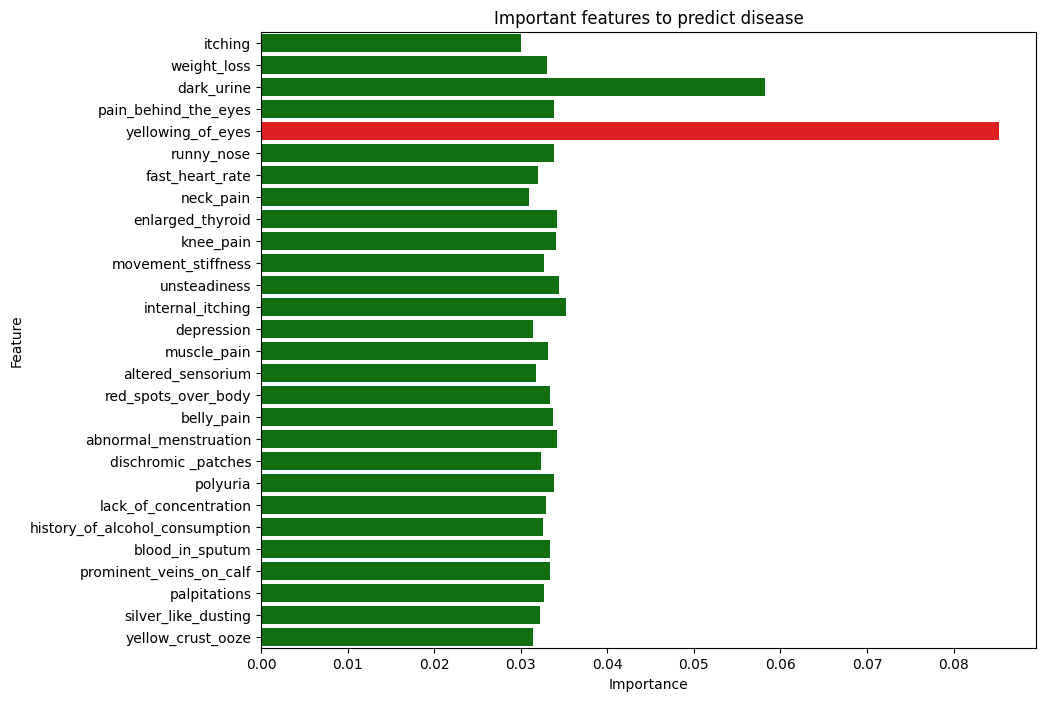

In [184]:
values = feat_df.Importance    
index = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=index,x=values,palette=clrs).set(title='Important features to predict disease')
plt.show()

# Using cross validation on training set and calculating the accuracy scores to find a good train test split.
# Previously we are using a test_size of 0.25.

In [185]:
Scores=[]
for i in range(2,16):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(tree2, newX,newY,scoring="accuracy", cv=i)
#     print("scores for k=",i,scores)
    tree2_accuracy_scores=np.array(scores)
    Scores.append(tree2_accuracy_scores.mean())

In [186]:
Scores

[0.7439024390243902,
 0.7536585365853657,
 0.7536585365853659,
 0.7536585365853657,
 0.7536585365853657,
 0.7534608060923851,
 0.7536585365853659,
 0.7530642219856113,
 0.7536585365853659,
 0.7522503014323484,
 0.753658536585366,
 0.7530790815751238,
 0.752061595811596,
 0.7536585365853661]

## <font color="red">Above scores shows that our training data is fairly distributed such that a random selection of training data covers all types of instances.

# Ensemble method

## <font color="red">Shuffling our training data to generate different decision trees  

## <font color="red">Decision trees(or say,how many doctors we are training?):100

In [187]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=100, test_size=.25, random_state=42)

In [188]:
rs.get_n_splits(df)

100

In [189]:
print(rs)

ShuffleSplit(n_splits=100, random_state=42, test_size=0.25, train_size=None)


In [190]:
Scores=[]
for train_index, test_index in rs.split(df):
    # print("TRAIN:", train_index, "TEST:", test_index)
    data_train_features=newX.iloc[train_index]
    data_test_features=newX.iloc[test_index]
    data_train_disease=newY.iloc[train_index]
    data_test_disease=newY.iloc[test_index]
    dec_tree=DecisionTreeClassifier(random_state=0)
    dec_tree.fit(data_train_features,data_train_disease)
    dec_tree.predict(data_test_features)
    Scores.append(dec_tree.score(data_test_features,data_test_disease))
    
    
    

In [191]:
data_test_features

,itching,weight_loss,dark_urine,pain_behind_the_eyes,yellowing_of_eyes,runny_nose,fast_heart_rate,neck_pain,enlarged_thyroid,knee_pain,...,abnormal_menstruation,dischromic _patches,polyuria,lack_of_concentration,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,silver_like_dusting,yellow_crust_ooze
2147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2270,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color="red">Score of each doctor after training

In [192]:
Scores

[0.7105691056910569,
 0.7504065040650406,
 0.7317073170731707,
 0.748780487804878,
 0.7268292682926829,
 0.7365853658536585,
 0.7430894308943089,
 0.7552845528455284,
 0.7373983739837399,
 0.7544715447154472,
 0.7268292682926829,
 0.7585365853658537,
 0.748780487804878,
 0.7276422764227642,
 0.7528455284552845,
 0.7414634146341463,
 0.734959349593496,
 0.7235772357723578,
 0.7373983739837399,
 0.7552845528455284,
 0.7333333333333333,
 0.7373983739837399,
 0.7471544715447155,
 0.7463414634146341,
 0.7520325203252033,
 0.7609756097560976,
 0.7398373983739838,
 0.7617886178861789,
 0.7504065040650406,
 0.732520325203252,
 0.7390243902439024,
 0.7528455284552845,
 0.7447154471544716,
 0.7552845528455284,
 0.767479674796748,
 0.7447154471544716,
 0.7390243902439024,
 0.7552845528455284,
 0.7317073170731707,
 0.740650406504065,
 0.7471544715447155,
 0.7121951219512195,
 0.7520325203252033,
 0.751219512195122,
 0.7471544715447155,
 0.724390243902439,
 0.7422764227642277,
 0.7528455284552845,


In [193]:
len(Scores)

100

In [194]:
type(train_index)

numpy.ndarray

In [195]:
type(test_index)

numpy.ndarray

In [196]:
dec_tree.predict(data_test_features)

array(['GERD', 'Psoriasis', 'Hepatitis E', ..., 'Typhoid',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis E'],
      dtype=object)

## Taking input from user

In [197]:
def ensemble_method(array):
    Predictions=[]
    for train_index, test_index in rs.split(df):
        data_train_features=newX.iloc[train_index]
        data_train_disease=newY.iloc[train_index]
        dec_tree=DecisionTreeClassifier(random_state=0)
        dec_tree.fit(data_train_features,data_train_disease)
        Predictions.append(dec_tree.predict(array))
    return Predictions

In [198]:
array=[]
for k in newX.columns:
    print(k,"?")
    check=input()
    if check in ["y","yes","Yes","Y"]:
        array.append(1)
    else:
        array.append(0)

itching ?
y
weight_loss ?
n
dark_urine ?
n
pain_behind_the_eyes ?
n
yellowing_of_eyes ?
n
runny_nose ?
n
fast_heart_rate ?
y
neck_pain ?
y
enlarged_thyroid ?
n
knee_pain ?
n
movement_stiffness ?
y
unsteadiness ?
y
internal_itching ?
n
depression ?
y
muscle_pain ?
n
altered_sensorium ?
n
red_spots_over_body ?
n
belly_pain ?
n
abnormal_menstruation ?
n
dischromic _patches ?
y
polyuria ?
n
lack_of_concentration ?
y
history_of_alcohol_consumption ?
n
blood_in_sputum ?
n
prominent_veins_on_calf ?
n
palpitations ?
y
silver_like_dusting ?
n
yellow_crust_ooze ?
y


In [199]:
type(array)
array=np.array(array)
array=array.reshape(1,-1)

In [200]:
array.shape

(1, 28)

In [201]:
pd.DataFrame(array,index=['input_symptoms'] , columns=newX.columns)

,itching,weight_loss,dark_urine,pain_behind_the_eyes,yellowing_of_eyes,runny_nose,fast_heart_rate,neck_pain,enlarged_thyroid,knee_pain,...,abnormal_menstruation,dischromic _patches,polyuria,lack_of_concentration,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,silver_like_dusting,yellow_crust_ooze
input_symptoms,1,0,0,0,0,0,1,1,0,0,...,0,1,0,1,0,0,0,1,0,1


In [202]:
disease_predictions=ensemble_method(array)

C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feat

C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feat

C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nehal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feat

In [203]:
disease_predictions

[array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object),
 array(['Migraine'], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Hypertension '], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Impetigo'], dtype=object),
 array(['Hypertension '], dtype=object),
 array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object),
 array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Impetigo'], dtype=object),
 array(['Hypoglycemia'], dtype=object),
 array(['Migraine'], dtype=object),
 array(['Pneumonia'], dtype=object),
 array(['Pneumonia'], dtype=object),
 array(['Arthritis'], dtype=object),
 array(['Pneumonia'], dtype=object),
 array(['Hypertension '], dtype=object),
 array(['Hypertension '], dtype=object),
 array(['Migraine'], dt

In [204]:
disease_predictions_array=[]
for i in range(len(disease_predictions)):
    print(disease_predictions[i][0])
    disease_predictions_array.append(disease_predictions[i][0])
    

(vertigo) Paroymsal  Positional Vertigo
Migraine
Hypoglycemia
Hypertension 
Hypoglycemia
Hypoglycemia
Hypoglycemia
Hypoglycemia
Impetigo
Hypertension 
(vertigo) Paroymsal  Positional Vertigo
(vertigo) Paroymsal  Positional Vertigo
Hypoglycemia
Hypoglycemia
Impetigo
Hypoglycemia
Migraine
Pneumonia
Pneumonia
Arthritis
Pneumonia
Hypertension 
Hypertension 
Migraine
Hypoglycemia
Pneumonia
Pneumonia
(vertigo) Paroymsal  Positional Vertigo
Hypertension 
Impetigo
Hypoglycemia
Hypoglycemia
Pneumonia
Arthritis
Pneumonia
Arthritis
Migraine
(vertigo) Paroymsal  Positional Vertigo
Hypoglycemia
Pneumonia
Hypoglycemia
Impetigo
Pneumonia
Hypoglycemia
Hypoglycemia
Hypoglycemia
Hypoglycemia
(vertigo) Paroymsal  Positional Vertigo
(vertigo) Paroymsal  Positional Vertigo
Hypertension 
Arthritis
Impetigo
Arthritis
(vertigo) Paroymsal  Positional Vertigo
(vertigo) Paroymsal  Positional Vertigo
Hypoglycemia
Impetigo
Hypoglycemia
Hypoglycemia
Pneumonia
Hypoglycemia
Hypoglycemia
Hypoglycemia
Hypoglycemia
Hype

In [205]:
disease_predictions_array

['(vertigo) Paroymsal  Positional Vertigo',
 'Migraine',
 'Hypoglycemia',
 'Hypertension ',
 'Hypoglycemia',
 'Hypoglycemia',
 'Hypoglycemia',
 'Hypoglycemia',
 'Impetigo',
 'Hypertension ',
 '(vertigo) Paroymsal  Positional Vertigo',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Hypoglycemia',
 'Hypoglycemia',
 'Impetigo',
 'Hypoglycemia',
 'Migraine',
 'Pneumonia',
 'Pneumonia',
 'Arthritis',
 'Pneumonia',
 'Hypertension ',
 'Hypertension ',
 'Migraine',
 'Hypoglycemia',
 'Pneumonia',
 'Pneumonia',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Hypertension ',
 'Impetigo',
 'Hypoglycemia',
 'Hypoglycemia',
 'Pneumonia',
 'Arthritis',
 'Pneumonia',
 'Arthritis',
 'Migraine',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Hypoglycemia',
 'Pneumonia',
 'Hypoglycemia',
 'Impetigo',
 'Pneumonia',
 'Hypoglycemia',
 'Hypoglycemia',
 'Hypoglycemia',
 'Hypoglycemia',
 '(vertigo) Paroymsal  Positional Vertigo',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Hypertension ',
 'Arthritis',
 'Impetig

In [206]:
dictionary={}
for i in range(len(disease_predictions_array)):
    disease=disease_predictions_array[i]
    if disease not in dictionary:
        dictionary[disease]=1
    else:
        dictionary[disease]+=1
        

In [207]:
dictionary

{'(vertigo) Paroymsal  Positional Vertigo': 13,
 'Migraine': 5,
 'Hypoglycemia': 41,
 'Hypertension ': 9,
 'Impetigo': 8,
 'Pneumonia': 15,
 'Arthritis': 9}

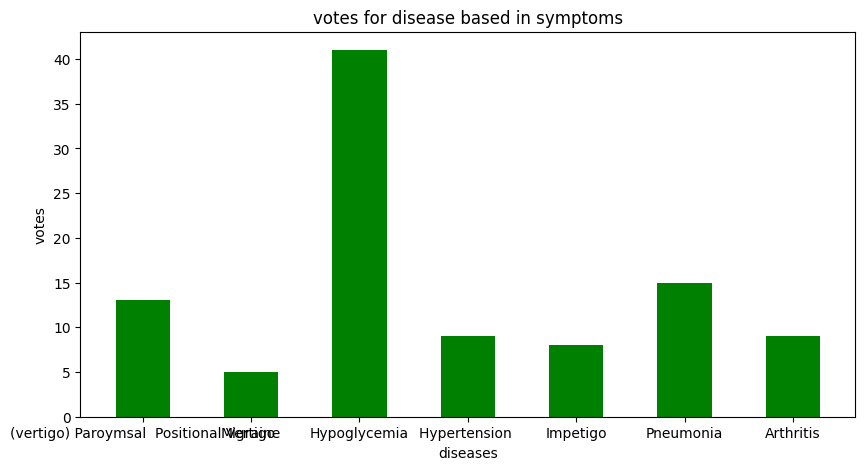

In [208]:
disease = list(dictionary.keys())
votes = list(dictionary.values())
  
fig = plt.figure(figsize = (10, 5))#denotes size of figure in inches
 
# creating the bar plot
plt.bar(disease, votes, color ='green',
        width = 0.5)
 
plt.xlabel("diseases")
plt.ylabel("votes")
plt.title("votes for disease based in symptoms")
plt.show()